<a href="https://colab.research.google.com/github/leksandre/-crab-for-web2ipr_book_shop/blob/main/YOLOv9___Window9k___Finetuning_for_PPE_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /content/train
%cd /content/train
!mkdir /content/train/dataset
!mkdir /content/train/backup
!ls /content/train/dataset
!ls -lsaht /content/drive/MyDrive/datasets/

/content/train
total 875M
 28M -rw------- 1 root root  28M Aug 15 17:42 windowsYolo9_v3.onnx
 15M -rw------- 1 root root  15M Aug 15 17:42 windowsYolo9_v3.pt
 15M -rw------- 1 root root  15M Aug 15 11:01 windowsYolo9_v3_bad_onlyWinows.pt
 28M -rw------- 1 root root  28M Aug 15 11:01 windowsYolo9_v3_bad_onlyWinows.onnx
 70M -rw------- 1 root root  70M Aug 15 07:19 windows9kYolo9.zip
 28M -rw------- 1 root root  28M Aug 14 17:52 buildingYolo9_v4.onnx
 15M -rw------- 1 root root  15M Aug 14 17:51 buildingYolo9_v4.pt
 28M -rw------- 1 root root  28M Aug 14 15:57 windowsYolo9_v2.onnx
 15M -rw------- 1 root root  15M Aug 14 15:52 windowsYolo9_v2.pt
 15M -rw------- 1 root root  15M Aug 14 12:35 buildingYolo9_v3.pt
307K -rw------- 1 root root 307K Aug 14 09:22 photo2.jpg
 15M -rw------- 1 root root  15M Aug 11 12:27 buildingYolo9_v2.pt
 15M -rw------- 1 root root  15M Aug 11 10:56 windowsYolo9_v1.pt
 15M -rw------- 1 root root  15M Aug 11 10:41 buildingYolo9_v1.pt
463K -rw------- 1 root root 4

In [ ]:
import glob

In [ ]:
arch_01 = glob.glob('/content/drive/MyDrive/datasets/windows9kYolo9.zip')[0]

In [ ]:
print(arch_01)

/content/drive/MyDrive/datasets/windows9kYolo9.zip


In [ ]:
myvar = "/content/train/"
!cd {myvar}

In [ ]:
!cp {arch_01} "/content/train/"

In [ ]:
import os
import os.path

In [ ]:
if os.path.exists(arch_01) or os.path.isfile(arch_01):
  if os.path.isfile(arch_01):
    !unrar x -Y {arch_01} "/content/train/dataset"
    !unzip {arch_01} -d "/content/train/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.0e8935e70798bf9f86d2d7c0d94a09ee.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.24eaabf44cfb6200ad88800f9ebf85f4.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.2511882f7b33c0c3b5a25fe56df72410.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.3e8bf448dbd37e1f6cd727ac98643607.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.442c9c9e846424b4bce25f0ce77d2783.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.65d26cfa2be00bf626b0df497e0f30e8.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg.rf.689c6fe7e1d6d3f8cfb4969a03f737e8.txt  
  inflating: /content/train/dataset/train/labels/images-2021-12-29T121052-065_jpg

In [ ]:
TRAIN_IMAGE_PATH = '/content/train/dataset/train/'
TEST_IMAGE_PATH = '/content/train/dataset/test/'
VAL_IMAGE_PATH = '/content/train/dataset/valid/'

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
snehilsanyal_construction_site_safety_image_dataset_roboflow_path = kagglehub.dataset_download('snehilsanyal/construction-site-safety-image-dataset-roboflow')

print('Data source import complete.')


Data source import complete.


# About

- In this notebook I will train Yolo v9 model to detect PPE (Personal Protective Equipment), using [this existing dataset](https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow) from [Roboflow](https://universe.roboflow.com/)
- In the [next notebook](https://www.kaggle.com/hinepo/yolov9-inference-for-red-zone-application) I will use this custom model to make inference on videos and post-process the results so they can be used in a Red Zone/Trespassing detection application
- This notebook is a generic training pipeline that you can use to train any Yolo model for object detection task on any dataset (images/number of classes), as long as you provide the dataset in the correct folder structure accepted by Yolo and the annotations/labels in Yolo format
- [Ultralytics - docs](https://docs.ultralytics.com/)
- [Ultralytics - github](https://github.com/ultralytics/ultralytics)

___

[CSS (Construction Site Safety) Dataset](https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow):

- Labels in this dataset:
    - 0: Window


- More info:
    - Number of classes: 10
    - Label Annotation: YOLO format (.txt)
      - `[class_id, center_x, center_y, width, height]`
      
___      

Yolo Dataset folder structure: the paths to these folders will be written to a YAML file that will be used by Yolo.

```
Custom dataset directory (root)
    - train
        - images (folder including all training images)
        - labels (folder including all training labels)
    - validation
        - images (folder including all validation images)
        - labels (folder including all validation labels)
    - test
        - images (folder including all test images)
        - labels (folder including all test labels)

```

**<font color='orange'>If you like this notebook, don't forget to show your support with your upvote!</font>**

In [ ]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-760d0529-36f2-1d64-e07f-0d7753132e99)


# Installs/Imports

In [ ]:
%%time

! pip install --upgrade ultralytics -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.3 MB/s eta 0:00:00
CPU times: user 1.21 s, sys: 122 ms, total: 1.

In [ ]:
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.179


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2

from ultralytics import YOLO

In [ ]:
! wandb disabled

W&B disabled.


# CFG

- CFG class enables easy and organized experimentation
- Set `DEBUG = True` to make quick experiments

In [ ]:
class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = ['Window','windows']
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # training
    EPOCHS = 3 if DEBUG else 100 # 100
    BATCH_SIZE = 16

    BASE_MODEL = 'yolov9e' # yolov8n, yolov8s, yolov8m, yolov8l, yolov8x, yolov9c, yolov9e
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'

    OPTIMIZER = 'auto' # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0

    # paths
    CUSTOM_DATASET_DIR = '/content/train/dataset/'
    OUTPUT_DIR = './'

# Create YAML file

- Create ```data.yaml``` file properly formatted to be used by Yolo

In [ ]:
dict_file = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train'),
    'val': os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid'),
    'test': os.path.join(CFG.CUSTOM_DATASET_DIR, 'test'),
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
    }

with open(os.path.join(CFG.OUTPUT_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [ ]:
### read yaml file created
def read_yaml_file(file_path = CFG.CUSTOM_DATASET_DIR):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print("Error reading YAML:", e)
            return None

### print it with newlines
def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

file_path = os.path.join(CFG.OUTPUT_DIR, 'data.yaml')
yaml_data = read_yaml_file(file_path)

if yaml_data:
    print_yaml_data(yaml_data)

names:
- Window
- windows
nc: 2
test: /content/train/dataset/test
train: /content/train/dataset/train
val: /content/train/dataset/valid



# Dataset

- Check some images
- Image utils

## Visualize one image

In [ ]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):  # Check if it's a file path
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):  # Check if it's a NumPy array
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

In [ ]:
folder_path1 = CFG.CUSTOM_DATASET_DIR + 'train/images/'

Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (200, 200, 3) 



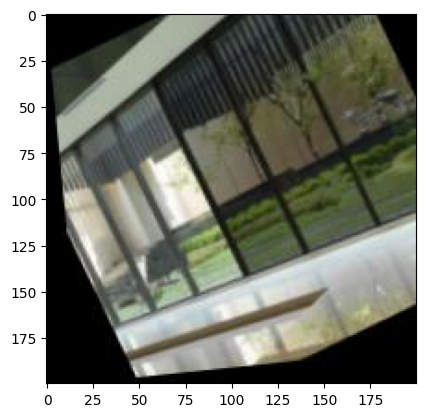

In [ ]:
example_image_path =  glob.glob(folder_path1+'/*.jpg')[0]
display_image(example_image_path, print_info = True, hide_axis = False)

## Visualize many images

In [ ]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):

    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        # Open and display the image using PIL
        img = Image.open(os.path.join(folder_path, file_name))

        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]

        ax.imshow(img)
        ax.axis('off')
        # ax.set_title(file_name)

    # Remove empty subplots
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()

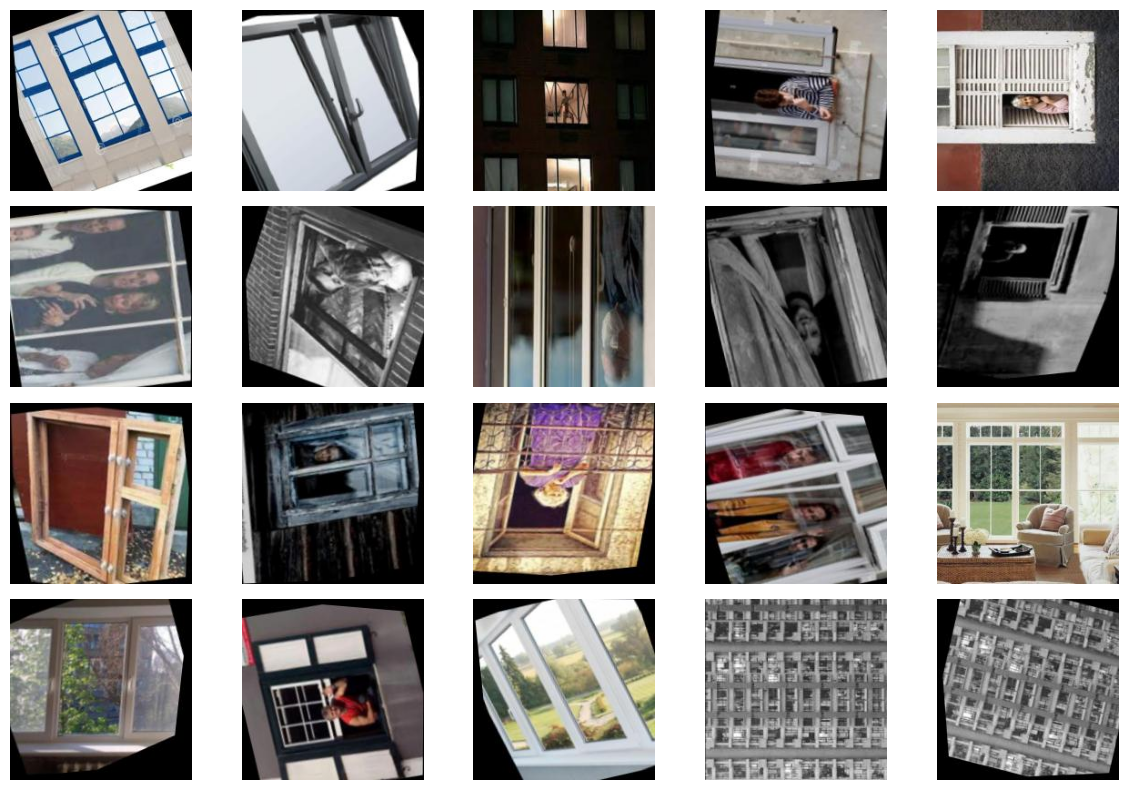

In [ ]:
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/images/'
plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED)
# plot_random_images_from_folder(folder_path, num_images=20, seed=54)

## Image properties

In [ ]:
def get_image_properties(image_path):
    # Read the image file
    img = cv2.imread(image_path)

    # Check if the image file is read successfully
    if img is None:
        raise ValueError("Could not read image file")

    # Get image properties
    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }

    return properties

In [ ]:
print(example_image_path)

/content/train/dataset/train/images/Window_134_jpg.rf.84cb2a077239899f971034fb131db51e.jpg


In [ ]:
img_properties = get_image_properties(example_image_path)
img_properties

{'width': 200, 'height': 200, 'channels': 3, 'dtype': dtype('uint8')}

## Dataset statistics

In [ ]:
%%time
class_idx = {str(i): CFG.CLASSES[i] for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

class_stat = {}
data_len = {}
class_info = []

for mode in ['train', 'valid', 'test']:
    class_count = {CFG.CLASSES[i]: 0 for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

    path = os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'labels')

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

    class_info.append({'Mode': mode, **class_count, 'Data_Volume': data_len[mode]})

dataset_stats_df = pd.DataFrame(class_info)
dataset_stats_df

CPU times: user 410 ms, sys: 352 ms, total: 762 ms
Wall time: 3.58 s


,Mode,Window,windows,Data_Volume
0,train,708,6180,8289
1,valid,82,565,795
2,test,46,280,399


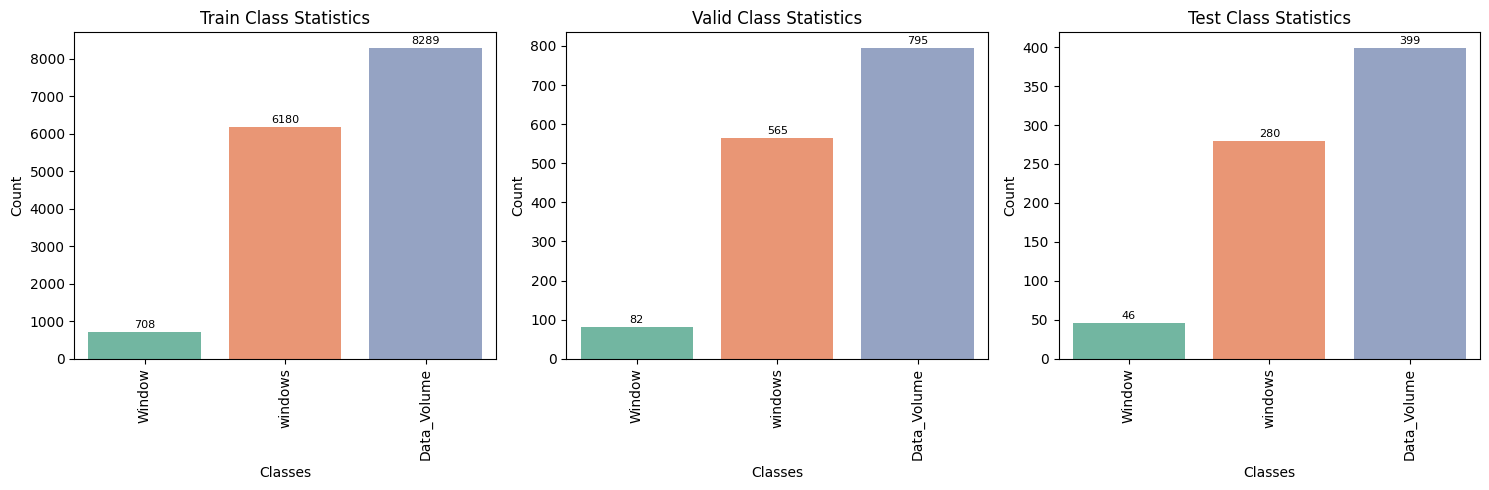

In [ ]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot vertical bar plots for each mode in subplots
for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(
        data=dataset_stats_df[dataset_stats_df['Mode'] == mode].drop(columns='Mode'),
        orient='v',
        ax=axes[i],
        palette='Set2'
    )

    axes[i].set_title(f'{mode.capitalize()} Class Statistics')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

    # Add annotations on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

## Image sizes

In [ ]:
%%time

for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:')

    img_size = 0
    for file in glob.glob(os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'images', '*')):

        image = Image.open(file)

        if image.size != img_size:
            print(f'{image.size}')
            img_size = image.size
            print('\n')


Image sizes in train set:
(200, 200)



Image sizes in valid set:
(200, 200)



Image sizes in test set:
(200, 200)


CPU times: user 978 ms, sys: 355 ms, total: 1.33 s
Wall time: 4.4 s


# Base Model Inference

- Just checking the power of the pretrained model inference on the CSS dataset

In [ ]:
CFG.BASE_MODEL_WEIGHTS

'yolov9e.pt'

In [ ]:
import torch
print(torch.version.cuda)

12.4


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Указывает на первый GPU

In [ ]:
# Проверка доступности GPU
print(f"GPU доступен: {torch.cuda.is_available()}")
print(f"Количество GPU: {torch.cuda.device_count()}")

GPU доступен: True
Количество GPU: 1


In [ ]:
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

results = model.predict(
    source = example_image_path,

    classes = [0,1],
    conf = 0.30,
    device = 0, # inference with dual GPU
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)


WARNING ⚠️ imgsz=[200, 200] must be multiple of max stride 32, updating to [224, 224]
image 1/1 /content/train/dataset/train/images/Window_134_jpg.rf.84cb2a077239899f971034fb131db51e.jpg: 224x224 (no detections), 32.1ms
Speed: 9.8ms preprocess, 32.1ms inference, 124.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict
0 label saved to runs/detect/predict/labels


In [ ]:
### check predictions with base model
example_image_inference_output = example_image_path.split('/')[-1]
print(example_image_inference_output)


Window_134_jpg.rf.84cb2a077239899f971034fb131db51e.jpg


Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'> 

Shape:  (200, 200, 3) 



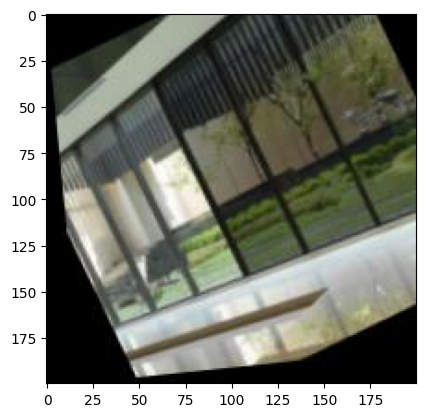

In [ ]:
display_image(f'/content/train/dataset/train/images/{example_image_inference_output}')

# Train

[Arguments for training](https://docs.ultralytics.com/modes/train/#arguments)

In [ ]:
CFG.BASE_MODEL_WEIGHTS = 'yolov9s.pt'
#CFG.BATCH_SIZE = 16

In [ ]:
print('Model: ', CFG.BASE_MODEL_WEIGHTS)
print('Epochs: ', CFG.EPOCHS)
print('Batch: ', CFG.BATCH_SIZE)

Model:  yolov9s.pt
Epochs:  100
Batch:  16


In [ ]:
### Load pre-trained YOLO model
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

In [ ]:
!cp /content/drive/MyDrive/datasets/windowsYolo9_v3.pt /content/train/

In [ ]:
!pwd

/content/train


In [ ]:
model = YOLO('windowsYolo9_v3.pt')

In [ ]:
%%time

### train
model.train(
    data = os.path.join(CFG.OUTPUT_DIR, 'data.yaml'),

    task = 'detect',

    imgsz = (img_properties['height'], img_properties['width']),

    epochs = CFG.EPOCHS,
    batch = CFG.BATCH_SIZE,
    optimizer = CFG.OPTIMIZER,
    lr0 = CFG.LR,
    lrf = CFG.LR_FACTOR,
    weight_decay = CFG.WEIGHT_DECAY,
    dropout = CFG.DROPOUT,
    fraction = CFG.FRACTION,
    patience = CFG.PATIENCE,
    profile = CFG.PROFILE,
    label_smoothing = CFG.LABEL_SMOOTHING,

    name = f'{CFG.BASE_MODEL}_{CFG.EXP_NAME}',
    seed = CFG.SEED,

    val = True,
    amp = True,
    exist_ok = True,
    resume = False,
    device = 0, #[0,1]
    verbose = False,
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=(200, 200), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=windowsYolo9_v3.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov9e_ppe_css_100_epochs, nbs=64, nms=False, opset=None, optimize=False, o


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics.nn.modules.block.AConv           [192

 22        [15, 18, 21]  1   1563862  ultralytics.nn.modules.head.Detect           [2, [128, 192, 256]]          
YOLOv9s summary: 544 layers, 7,288,182 parameters, 7,288,166 gradients, 27.4 GFLOPs

Transferred 1339/1339 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
WARNING ⚠️ updating to 'imgsz=200'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
WARNING ⚠️ imgsz=[200] must be multiple of max stride 32, updating to [224]
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 348.6±137.0 MB/s, size: 8.2 KB)


train: Scanning /content/train/dataset/train/labels... 8289 images, 1401 backgrounds, 0 corrupt: 100%|██████████| 8289/8289 [00:03<00:00, 2376.53it/s]


train: New cache created: /content/train/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 292.2±137.6 MB/s, size: 7.2 KB)


val: Scanning /content/train/dataset/valid/labels... 795 images, 148 backgrounds, 0 corrupt: 100%|██████████| 795/795 [00:00<00:00, 1705.73it/s]

val: New cache created: /content/train/dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 1942. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov9e_ppe_css_100_epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/yolov9e_ppe_css_100_epochs
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.727G     0.7456     0.5459      1.115          5        224: 100%|██████████| 519/519 [02:21<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.66it/s]

                   all        795       1942      0.882      0.804      0.894      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.865G      0.792     0.5769      1.132          1        224: 100%|██████████| 519/519 [02:07<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]

                   all        795       1942      0.854      0.812       0.87      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.893G     0.8663     0.6717       1.18          3        224: 100%|██████████| 519/519 [02:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.38it/s]

                   all        795       1942      0.837       0.69      0.795      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      0.92G     0.9506     0.7783      1.231          5        224: 100%|██████████| 519/519 [02:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.12it/s]

                   all        795       1942      0.828      0.719      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.949G     0.9515     0.8083       1.23          5        224: 100%|██████████| 519/519 [02:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.30it/s]

                   all        795       1942      0.739      0.709      0.774      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.977G     0.9591     0.8107      1.235          2        224: 100%|██████████| 519/519 [02:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        795       1942        0.7      0.725      0.758      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         1G     0.9479     0.8051      1.232          1        224: 100%|██████████| 519/519 [02:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.30it/s]

                   all        795       1942      0.721      0.718      0.772      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.03G     0.9577     0.7854      1.236          9        224: 100%|██████████| 519/519 [02:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.32it/s]

                   all        795       1942      0.751      0.714      0.796      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.06G     0.9428     0.7856      1.233          2        224: 100%|██████████| 519/519 [02:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.20it/s]

                   all        795       1942      0.784      0.758      0.806      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.09G     0.9427      0.778      1.223          4        224: 100%|██████████| 519/519 [02:06<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.44it/s]

                   all        795       1942       0.74      0.774      0.779      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.12G     0.9362     0.7783      1.228          4        224: 100%|██████████| 519/519 [02:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.08it/s]

                   all        795       1942      0.778      0.733      0.815      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.14G     0.9321     0.7883      1.224          5        224: 100%|██████████| 519/519 [02:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.23it/s]

                   all        795       1942      0.759      0.752      0.786      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.17G     0.9391     0.7713      1.222          3        224: 100%|██████████| 519/519 [02:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]

                   all        795       1942      0.729      0.809       0.79      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.2G     0.9259     0.7677      1.221          1        224: 100%|██████████| 519/519 [02:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.16it/s]


                   all        795       1942      0.811      0.723      0.836       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.23G     0.9317     0.7618      1.226          5        224: 100%|██████████| 519/519 [02:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.68it/s]

                   all        795       1942      0.727      0.686      0.749      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.25G     0.9197     0.7742      1.219          0        224: 100%|██████████| 519/519 [02:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.24it/s]

                   all        795       1942      0.782      0.773      0.823      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.28G     0.9117     0.7534      1.211          1        224: 100%|██████████| 519/519 [02:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.34it/s]

                   all        795       1942      0.716      0.828      0.826      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.31G     0.9205      0.732       1.21         16        224: 100%|██████████| 519/519 [02:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]

                   all        795       1942      0.766      0.785      0.835        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.34G     0.9176     0.7399      1.208          2        224: 100%|██████████| 519/519 [02:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.31it/s]

                   all        795       1942      0.778      0.749       0.79      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.37G     0.9068     0.7287      1.205          4        224: 100%|██████████| 519/519 [02:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]

                   all        795       1942      0.763      0.761      0.826      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.39G     0.9067     0.7197      1.205          4        224: 100%|██████████| 519/519 [02:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.27it/s]

                   all        795       1942      0.785      0.735      0.809      0.573


EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

21 epochs completed in 0.760 hours.
Optimizer stripped from runs/detect/yolov9e_ppe_css_100_epochs/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/yolov9e_ppe_css_100_epochs/weights/best.pt, 15.2MB

Validating runs/detect/yolov9e_ppe_css_100_epochs/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 197 layers, 7,167,862 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]


                   all        795       1942      0.881      0.804      0.894       0.66
Speed: 0.0ms preprocess, 1.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/yolov9e_ppe_css_100_epochs
CPU times: user 42min 57s, sys: 31.7 s, total: 43min 29s
Wall time: 45min 59s


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c488618add0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Export

- [Export mode](https://docs.ultralytics.com/modes/export/) is used for exporting a YOLOv9 model to a format that can be used for deployment. In this mode, the model is converted to a format that can be used by other software applications or hardware devices. This mode is useful when deploying the model to production environments.

In [ ]:
img_properties

{'width': 200, 'height': 200, 'channels': 3, 'dtype': dtype('uint8')}

In [ ]:
# Export the model
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = (img_properties['height'], img_properties['width']),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
WARNING ⚠️ imgsz=[200, 200] must be multiple of max stride 32, updating to [224, 224]
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv9s summary (fused): 197 layers, 7,167,862 parameters, 0 gradients, 26.7 GFLOPs

PyTorch: starting from 'runs/detect/yolov9e_ppe_css_100_epochs/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 6, 1029) (14.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0,<1.18.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: export success ✅ 3.9s, saved as 'runs/detect/yolov9e_ppe_css_100_epochs/weights/best.onnx' (27.5 MB)

Export complete (4.6s)
Results saved to /content/train/runs

'runs/detect/yolov9e_ppe_css_100_epochs/weights/best.onnx'

# Train results

In [ ]:
results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'batch' not in i
]

results_paths

['./runs/detect/yolov9e_ppe_css_100_epochs/BoxF1_curve.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/BoxPR_curve.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/results.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/confusion_matrix.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/BoxP_curve.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/confusion_matrix_normalized.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/BoxR_curve.png',
 './runs/detect/yolov9e_ppe_css_100_epochs/labels_correlogram.jpg',
 './runs/detect/yolov9e_ppe_css_100_epochs/labels.jpg']

./runs/detect/yolov9e_ppe_css_100_epochs/BoxF1_curve.png


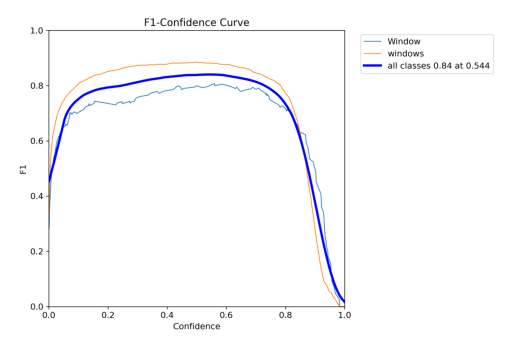



./runs/detect/yolov9e_ppe_css_100_epochs/BoxPR_curve.png


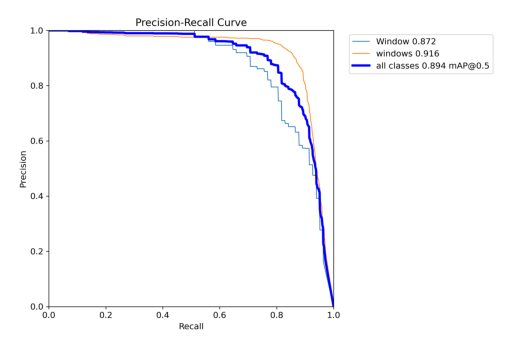



./runs/detect/yolov9e_ppe_css_100_epochs/BoxP_curve.png


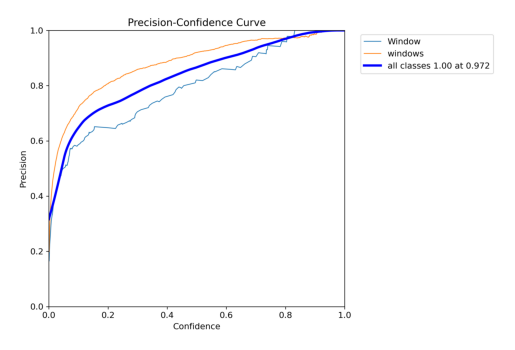



./runs/detect/yolov9e_ppe_css_100_epochs/BoxR_curve.png


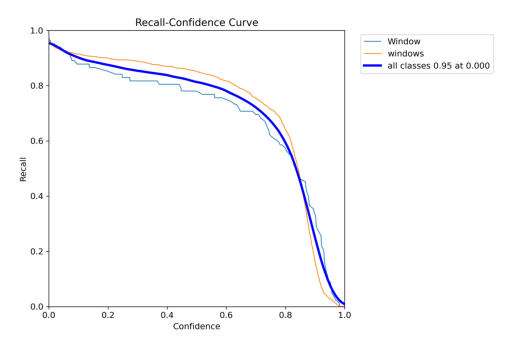



./runs/detect/yolov9e_ppe_css_100_epochs/confusion_matrix.png


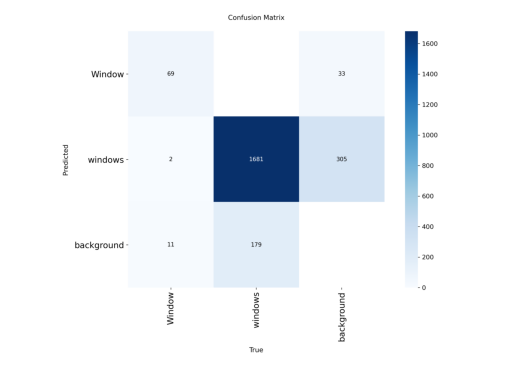



./runs/detect/yolov9e_ppe_css_100_epochs/confusion_matrix_normalized.png


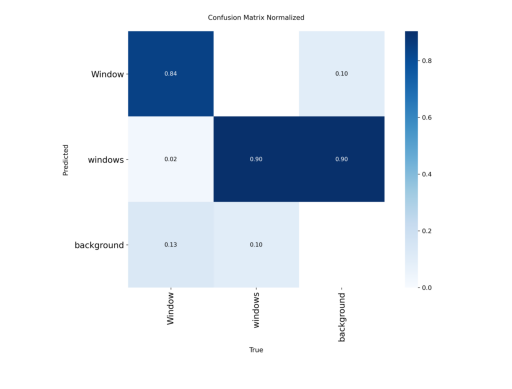



./runs/detect/yolov9e_ppe_css_100_epochs/labels.jpg


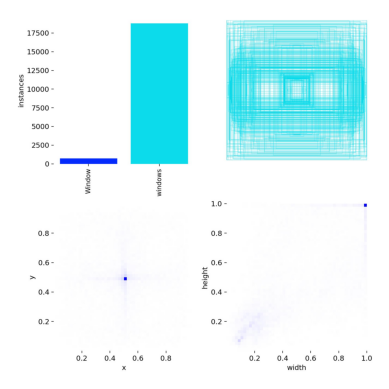



./runs/detect/yolov9e_ppe_css_100_epochs/labels_correlogram.jpg


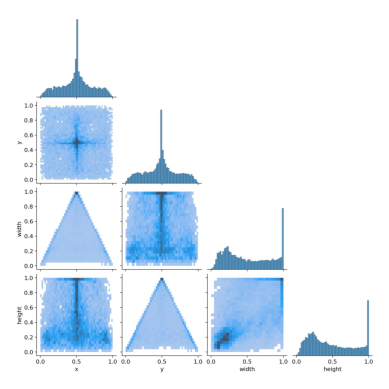



./runs/detect/yolov9e_ppe_css_100_epochs/results.png


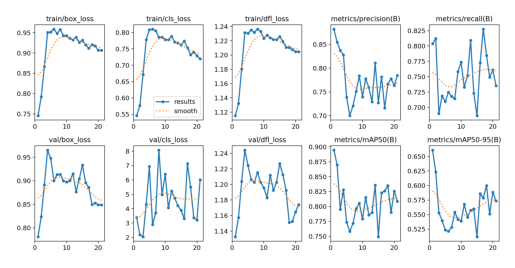

In [ ]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

# Loss

- The loss function in YOLO consists of three main components: box loss, class loss (cls loss), and objectness loss (dfl loss).
- The total loss in YOLO is a combination of these three components

___

**Box loss:**
- The box loss measures how accurately the predicted bounding box coordinates match the ground truth bounding box.
- Is typically computed using a regression loss, such as Mean Squared Error (MSE), between the predicted bounding box coordinates (center coordinates, width, and height) and the ground truth bounding box coordinates.

___

**Class loss (cls):**
- The class loss measures how well the predicted class probabilities match the true class labels.
- The class loss is usually computed using a categorical cross-entropy loss, which penalizes the difference between the predicted class probabilities and the true class labels.

___

**Objectness loss (dfl):**
- Distribution Focal Loss
- YOLO predicts an "objectness" score for each bounding box, indicating the presence of an object within the grid cell. This score helps filter out irrelevant bounding boxes.
- The objectness loss is calculated based on the difference between the predicted objectness score and the ground truth objectness label. It penalizes the model for false positives and false negatives in predicting the presence of an object.

In [ ]:
df = pd.read_csv(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{CFG.OUTPUT_DIR}training_log_df.csv', index=False)
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,146.699,0.74563,0.54591,1.11506,0.88227,0.80377,0.89445,0.66074,0.78116,3.38149,1.13269,0.003327,0.003327,0.003327
1,2,280.040,0.79197,0.57693,1.13222,0.85446,0.81218,0.86957,0.62331,0.82373,2.18229,1.15732,0.006594,0.006594,0.006594
2,3,408.914,0.86635,0.67166,1.18035,0.83733,0.68999,0.79514,0.55322,0.89143,2.04240,1.20387,0.009796,0.009796,0.009796
3,4,537.393,0.95059,0.77825,1.23146,0.82798,0.71880,0.82824,0.53966,0.96498,4.28683,1.24410,0.009703,0.009703,0.009703
4,5,664.950,0.95153,0.80831,1.23038,0.73879,0.70943,0.77363,0.52365,0.94724,6.93019,1.22443,0.009604,0.009604,0.009604
5,6,793.875,0.95905,0.81068,1.23515,0.70002,0.72460,0.75826,0.52144,0.90000,2.89469,1.20611,0.009505,0.009505,0.009505
6,7,921.988,0.94793,0.80508,1.23173,0.72063,0.71795,0.77176,0.52807,0.91320,3.69473,1.20266,0.009406,0.009406,0.009406
7,8,1051.040,0.95768,0.78542,1.23646,0.75134,0.71439,0.79641,0.55401,0.91341,8.07820,1.21543,0.009307,0.009307,0.009307
8,9,1181.740,0.94284,0.78556,1.23302,0.78370,0.75817,0.80562,0.54161,0.89964,4.96454,1.20270,0.009208,0.009208,0.009208
9,10,1313.940,0.94265,0.77796,1.22316,0.73955,0.77371,0.77897,0.53882,0.89714,6.40709,1.19559,0.009109,0.009109,0.009109


In [ ]:
print('*'*50)
print('\nBest Training Box loss: ', df['train/box_loss'].min(), ', on epoch: ', df['train/box_loss'].argmin() + 1, '\n')
print('\nBest Validation Box loss: ', df['val/box_loss'].min(), ', on epoch: ', df['val/box_loss'].argmin() + 1, '\n')

print('='*50)
print('\nBest Training Cls loss: ', df['train/cls_loss'].min(), ', on epoch: ', df['train/cls_loss'].argmin() + 1, '\n')
print('\nBest Validation Cls loss: ', df['val/cls_loss'].min(), ', on epoch: ', df['val/cls_loss'].argmin() + 1, '\n')

print('='*50)
print('\nBest Training DFL loss: ', df['train/dfl_loss'].min(), ', on epoch: ', df['train/dfl_loss'].argmin() + 1, '\n')
print('\nBest Validation DFL loss: ', df['val/dfl_loss'].min(), ', on epoch: ', df['val/dfl_loss'].argmin() + 1, '\n')

**************************************************

Best Training Box loss:  0.74563 , on epoch:  1 


Best Validation Box loss:  0.78116 , on epoch:  1 


Best Training Cls loss:  0.54591 , on epoch:  1 


Best Validation Cls loss:  2.0424 , on epoch:  3 


Best Training DFL loss:  1.11506 , on epoch:  1 


Best Validation DFL loss:  1.13269 , on epoch:  1 



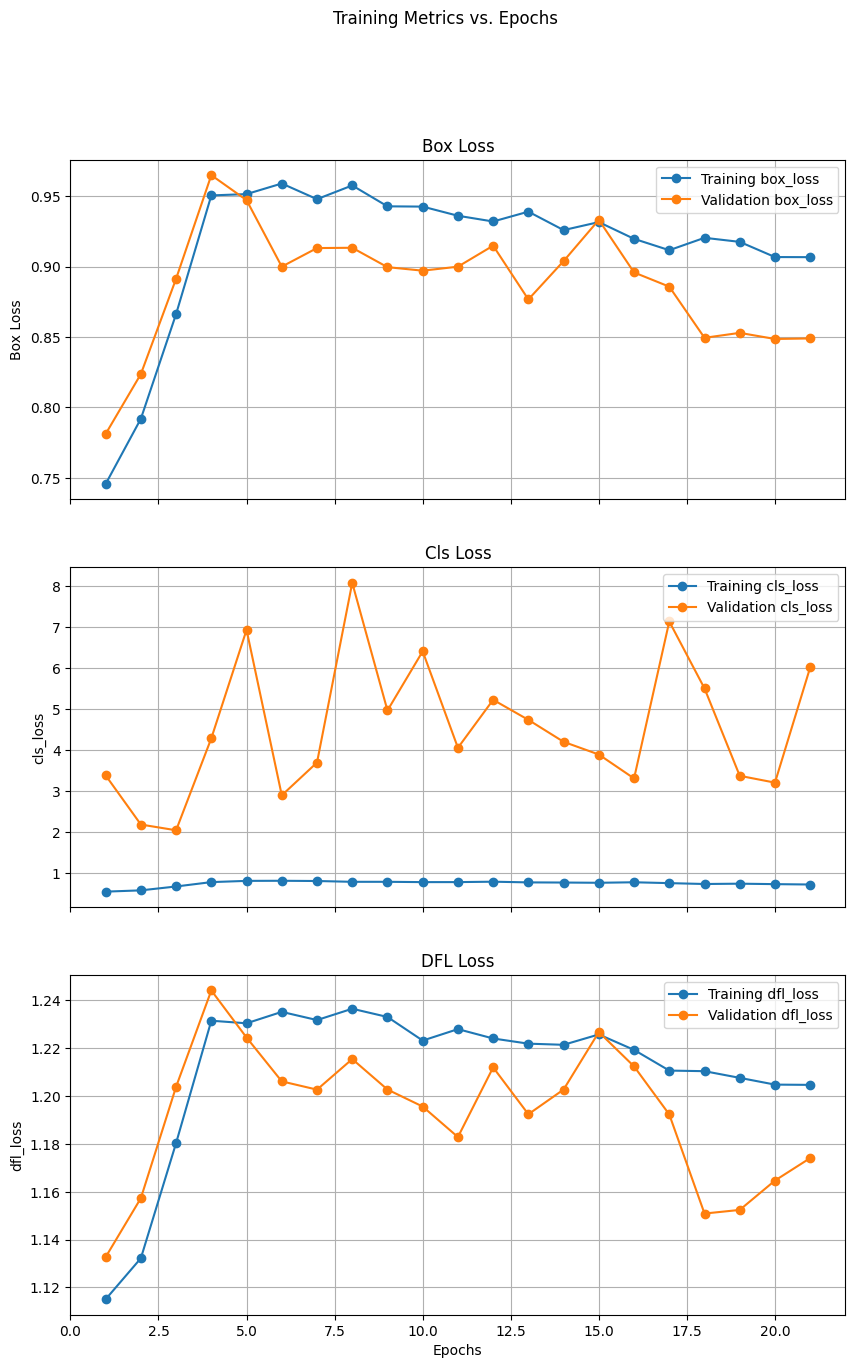

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

### Training and Validation box_loss
ax1.set_title('Box Loss')
ax1.plot(df['epoch'], df['train/box_loss'], label='Training box_loss', marker='o', linestyle='-')
ax1.plot(df['epoch'], df['val/box_loss'], label='Validation box_loss', marker='o', linestyle='-')
ax1.set_ylabel('Box Loss')
ax1.legend()
ax1.grid(True)

### Training and Validation cls_loss
ax2.set_title('Cls Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='Training cls_loss', marker='o', linestyle='-')
ax2.plot(df['epoch'], df['val/cls_loss'], label='Validation cls_loss', marker='o', linestyle='-')
ax2.set_ylabel('cls_loss')
ax2.legend()
ax2.grid(True)

### Training and Validation dfl_loss
ax3.set_title('DFL Loss')
ax3.plot(df['epoch'], df['train/dfl_loss'], label='Training dfl_loss', marker='o', linestyle='-')
ax3.plot(df['epoch'], df['val/dfl_loss'], label='Validation dfl_loss', marker='o', linestyle='-')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('dfl_loss')
ax3.legend()
ax3.grid(True)

plt.suptitle('Training Metrics vs. Epochs')
plt.show()

# Validation results

In [ ]:
validation_results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

6

In [ ]:
if len(validation_results_paths) >= 1:
    print(validation_results_paths[-1])

./runs/detect/yolov9e_ppe_css_100_epochs/val_batch0_labels.jpg


./runs/detect/yolov9e_ppe_css_100_epochs/val_batch0_labels.jpg


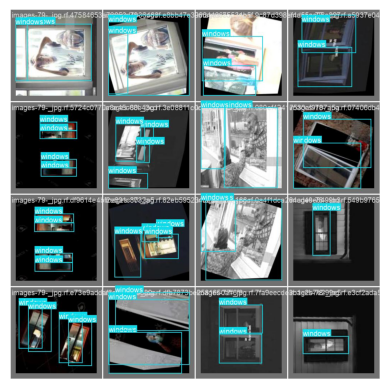

In [ ]:
### check predictions or labels from a random validation batch
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path, print_info = False, hide_axis = True)

# Conclusions

- So now the model is trained and we have customized Yolo to detect PPE.
- In my [next notebook](https://www.kaggle.com/hinepo/yolov9-inference-for-red-zone-application) I will use this model to make inference on a video, and combine the PPE detection with a Red Zone application.
- **<font color='orange'>Upvote if you liked it!</font>**